# Autoencoder

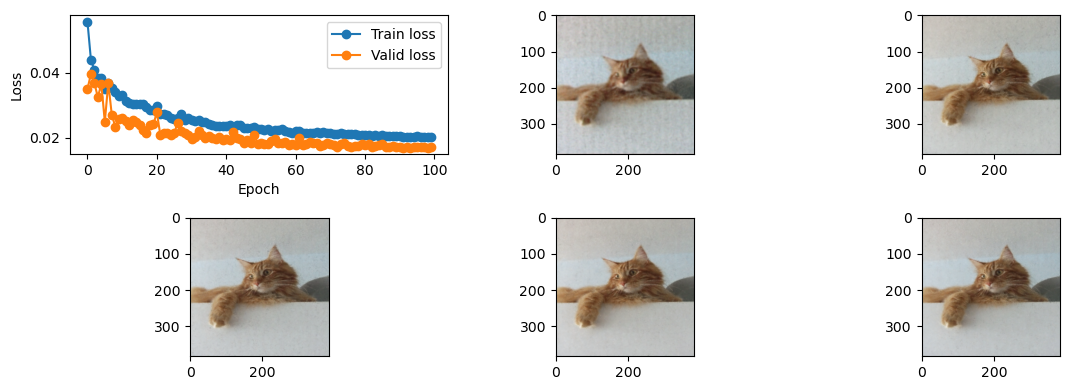

In [1]:
from torch import nn
from torchvision.models import resnet18, ResNet18_Weights
import train

import sys
sys.path.insert(0, '../')
from M09_segmentacao.models import EncoderDecoder

params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':100,
    'lr':0.1,
    'weight_decay':0,
    'resize_size':384,  
    'seed':0
}

encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=3)
# Adiciona camada sigmoide ao final pois a saída da rede deve estar em um intervalo
# delimitado. Afinal, imagens possuem intensidades em um intervalo delimitado.
model.classification = nn.Sequential(model.classification, nn.Sigmoid())
ds_train, ds_valid, logger = train.train(model, **params)
#100m

In [3]:
logger[-1][:-1]

(99, 0.02035691775381565, 0.017196903005242348, 0.0)

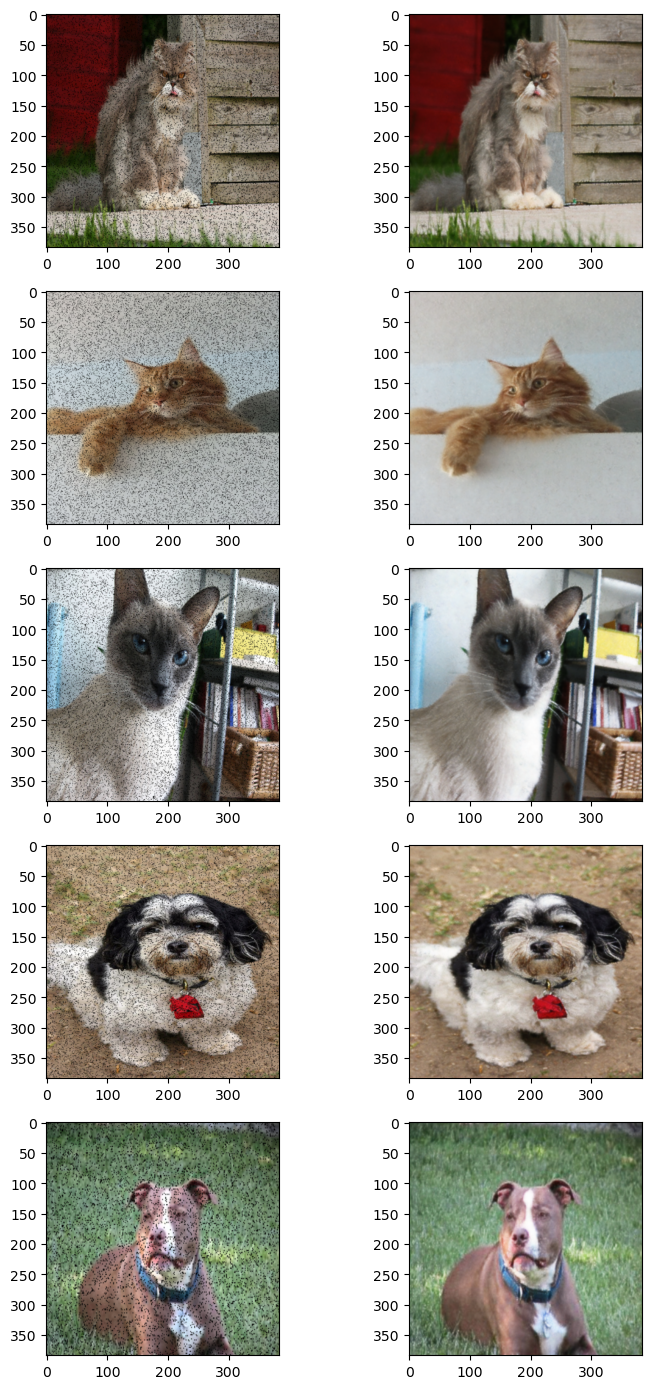

In [5]:
import matplotlib.pyplot as plt
import torch
import dataset

model.eval()
fig, axs = plt.subplots(5, 2, figsize=(8,14))
for idx in range(5):
    img, target = ds_valid[idx]
    with torch.no_grad():
        img_rec = model(img.unsqueeze(0))[0]
    
    axs[idx,0].imshow(img.permute(1, 2, 0))
    axs[idx,1].imshow(img_rec.permute(1, 2, 0))
plt.tight_layout()

# MSE

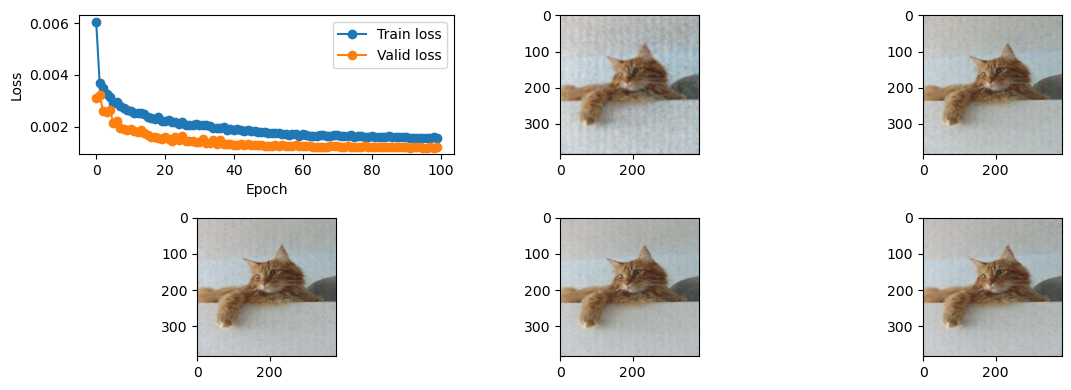

In [1]:
import torch
from torch import nn
from torchvision.models import resnet18, ResNet18_Weights
import train

import sys
sys.path.insert(0, '../')
from M09_segmentacao.models import EncoderDecoder

params = {
    'bs_train':32,
    'bs_valid':8,
    'num_epochs':100,
    'lr':0.1,
    'weight_decay':0.,
    'resize_size':384,  
    'seed':0
}

encoder = resnet18(weights=ResNet18_Weights.DEFAULT)
#encoder.requires_grad_(False)
model = EncoderDecoder(encoder, decoder_channels=64, num_classes=3)
model.classification = nn.Sequential(model.classification, nn.Sigmoid())
ds_train, ds_valid, logger = train.train(model, **params)
#45m

In [2]:
logger[-1][:-1]

(99, 0.0015796497464179993, 0.0012015309184789658, 0.0)

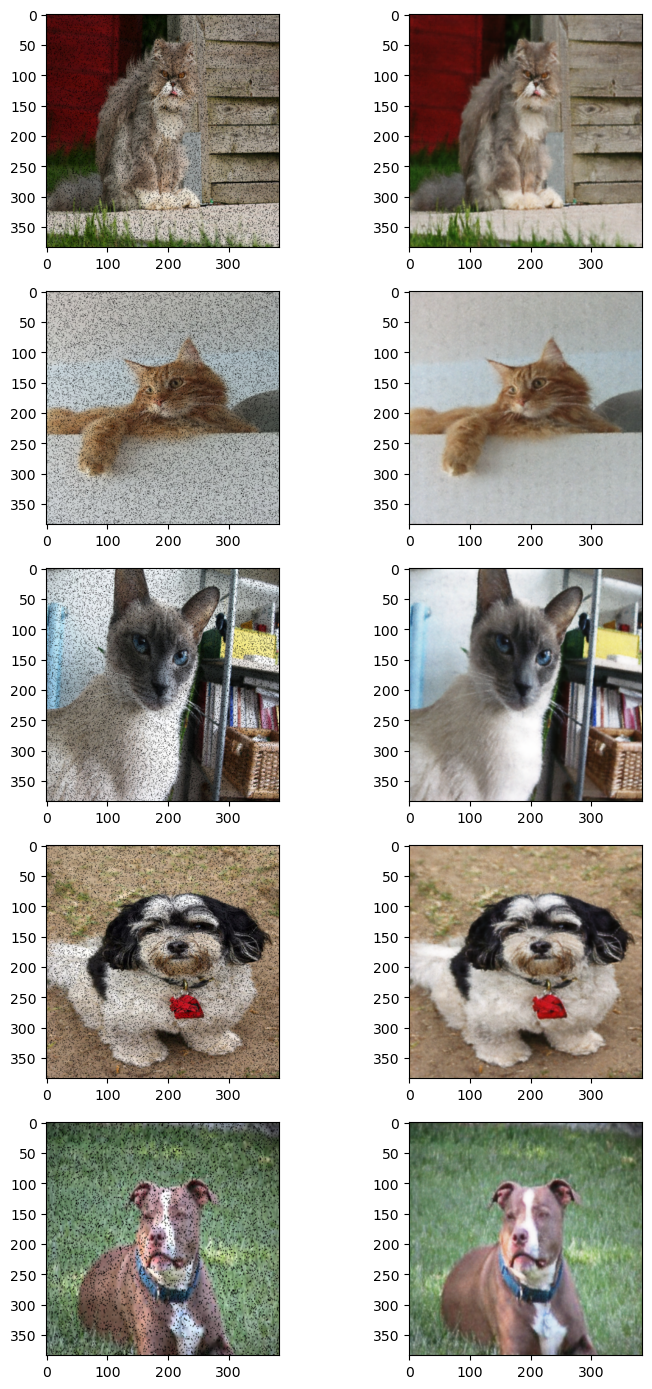

In [7]:
import matplotlib.pyplot as plt
import torch
import dataset

model.eval()
fig, axs = plt.subplots(5, 2, figsize=(8,14))
for idx in range(5):
    img, target = ds_valid[idx]
    with torch.no_grad():
        img_rec = model(img.unsqueeze(0))[0]
    
    axs[idx,0].imshow(img.permute(1, 2, 0))
    axs[idx,1].imshow(img_rec.permute(1, 2, 0))
plt.tight_layout()

True
True
True


In [9]:
x_samp.grad

C:\Users\appdn\AppData\Local\Temp\ipykernel_19596\85742549.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  x_samp.grad
